### There are 65 keys in the dictionary

##### Got some kind of error/warning with the following 
* tas_historical_CESM2
* tas_ssp126_CanESM5
* tas_ssp245_CAMS-CSM1-0
* tas_ssp245_HadGEM3-GC31-LL
* tas_ssp370_CESM2-WACCM
* tas_ssp370_MPI-ESM1-2-HR
* tas_ssp585_CAMS-CSM1-0
* tas_ssp585_CanESM5

For now, I am dealing with this by just ignoring these scenario/models, but the problem should be addressed at some point

In [1]:
import time
import analysis_parameters
import subcomp_a_create_data_dict as data_dict
import subcomp_a_process_climate_model_data as process_data

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['stac-catalog', 'stac-collection', 'stac-item'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [2]:
THIS_EXPERIMENT_ID = analysis_parameters.EXPERIMENT_LIST
THIS_VARIABLE_ID = analysis_parameters.VARIABLE_ID
THIS_TABLE_ID = analysis_parameters.TABLE_ID
THIS_GRID_LABEL = analysis_parameters.GRID_LABEL
OUTPUT_PATH = analysis_parameters.DIR_PROCESSED_DATA
DIR_INTERMEDIATE = analysis_parameters.DIR_INTERMEDIATE_DATA

EXCEPTIONS_LIST = ('tas_historical_CESM2',

                 'tas_ssp126_CanESM5', 'tas_ssp126_CAMS-CSM1-0',

                 'tas_ssp245_CAMS-CSM1-0', 'tas_ssp245_HadGEM3-GC31-LL',

                 'tas_ssp370_CESM2-WACCM', 'tas_ssp370_MPI-ESM1-2-HR',
                 'tas_ssp370_CAMS-CSM1-0', 'tas_ssp370_BCC-ESM1',

                 'tas_ssp585_CAMS-CSM1-0', 'tas_ssp585_CanESM5'
                )

In [3]:
# takes ~ 1 min
[DATASET_INFO,
 DSET_DICT,
 MODELNAMES] = data_dict.create_data_dict(THIS_EXPERIMENT_ID,
                                                           THIS_VARIABLE_ID,
                                                           THIS_TABLE_ID,
                                                           THIS_GRID_LABEL)

FINAL_GRID = process_data.create_reference_grid(reference_key='CMIP.CAMS.CAMS-CSM1-0.historical.Amon.gn',
                                                dset_dict=DSET_DICT)

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 65 group(s)


In [6]:
start_time = time.time()
process_data.process_all_files_in_dictionary(dset_dict=DSET_DICT,
                                             exceptions_list=EXCEPTIONS_LIST,
                                             final_grid = FINAL_GRID)
print(time.time() - start_time)

******** skipping ************
Overwrite existing file: nearest_s2d_160x320_160x320.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('lat', 'lon') from data variable tas as the horizontal dimensions for this dataset.
Create weight file: nearest_s2d_64x128_160x320.nc
using dimensions ('lat', 'lon') from data variable tas as the horizontal dimensions for this dataset.
Overwrite existing file: nearest_s2d_160x320_160x320.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('lat', 'lon') from data variable tas as the horizontal dimensions for this dataset.
Overwrite existing file: nearest_s2d_64x128_160x320.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('lat', 'lon') from data variable tas as the horizontal dimensions for this dataset.
Overwrite existing file: nearest_s2d_64x128_160x320.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('lat', 'lon') from data variable tas as the

KeyboardInterrupt: 

In [ ]:
# Run subcomponent b

start_time = time.time()
import subcomp_b_multi_model_stats
print(time.time() - start_time)

### Try Loading Data Back In

In [3]:
import analysis_parameters
import xarray as xr
DATA_PATH = analysis_parameters.DIR_INTERMEDIATE_DATA

def read_in_fname(fname):
    filename=DATA_PATH+fname+'.zarr'
    return xr.open_zarr(filename)
    

ds = read_in_fname('tas_historical_UKESM1-0-LL')

### Make example figure

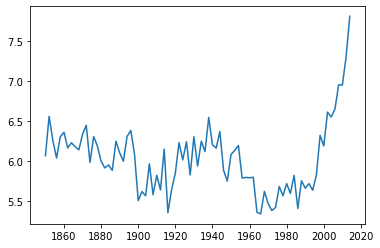

In [5]:
import matplotlib.pyplot as plt
thislat = 47.6062
thislon = 237.67

# Get data at single point
ds_point=ds.sel(lon=thislon, lat=thislat, method='nearest')
# Resample to two year annual average
ds_point=ds_point.resample(time='2AS').mean()

# Make plot
fig = plt.plot(ds_point['time'],ds_point['tas']-273.15)
plt.show()